Installing Necessary Packages

In [ ]:
!pip install pandas
!pip install hazm
!pip install nltk
!pip install scikit-learn matplotlib
!pip install datasets

# **Preprocesses**

Normalization for persian

In [2]:
import re
import unicodedata

def normalize_unicode(text):
    return unicodedata.normalize('NFC', text)

def normalize_arabic_persian_characters(text):
    arabic_to_persian = {
        'ك': 'ک',
        'ي': 'ی',
        'ى': 'ی',
        'ة': 'ه',
        'ؤ': 'و',
        'إ': 'ا',
        'أ': 'ا',
        'ٱ': 'ا',
    }
    for arabic_char, persian_char in arabic_to_persian.items():
        text = text.replace(arabic_char, persian_char)
    return text

def normalize_digits(text):
    arabic_digits = '۰۱۲۳۴۵۶۷۸۹'
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    digit_mapping = str.maketrans(arabic_digits + persian_digits, english_digits * 2)
    return text.translate(digit_mapping)

def strip_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def initial_normalization_persian(text,
                           normalize_unicode_flag=True,
                           normalize_arabic_persian_characters_flag=True,
                           normalize_digits_flag=True,
                           strip_extra_whitespace_flag=True):
    if normalize_unicode_flag:
        text = normalize_unicode(text)
    if normalize_arabic_persian_characters_flag:
        text = normalize_arabic_persian_characters(text)
    if normalize_digits_flag:
        text = normalize_digits(text)
    if strip_extra_whitespace_flag:
        text = strip_extra_whitespace(text)
    return text

example_text = "كتاب‌هاي خوبی هستند! ۱۲۳"
normalized_text = initial_normalization_persian(example_text,
                                         normalize_unicode_flag=True,
                                         normalize_arabic_persian_characters_flag=True,
                                         normalize_digits_flag=True,
                                         strip_extra_whitespace_flag=True)
print(normalized_text)  # Output: "کتابهای خوبی هستند 123"



کتاب‌های خوبی هستند! 123


In [3]:
from hazm import Stemmer, Lemmatizer

def final_normalization_persian(text,
                           stem_flag=False,
                           lemmatize_flag=False,
                           handle_suffixes_and_prefixes_flag=False):
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()

    if stem_flag:
        text = ' '.join(stemmer.stem(word) for word in text.split())

    if lemmatize_flag:
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    if handle_suffixes_and_prefixes_flag:
        pass

    return text

example_text = "کتاب‌ها گذشته‌اند و من می‌خواهم خواندنش را"
normalized_text = final_normalization_persian(example_text,
                                          stem_flag=True,
                                          lemmatize_flag=True,
                                          handle_suffixes_and_prefixes_flag=False)
print(normalized_text)

کتاب گذشت#گذر و من می‌خواه خواندن را


normalize for English

In [4]:
import re
import string
import unicodedata
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

def normalize_unicode(text):
    return unicodedata.normalize('NFKC', text)

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

def initial_normalization_english(text,
                           normalize_unicode_flag=True,
                           to_lowercase_flag=True,
                           remove_punctuation_flag=True,
                           remove_digits_flag=True,
                           remove_extra_whitespace_flag=True,
                           remove_stopwords_flag=False):
    if normalize_unicode_flag:
        text = normalize_unicode(text)
    if to_lowercase_flag:
        text = to_lowercase(text)
    if remove_punctuation_flag:
        text = remove_punctuation(text)
    if remove_digits_flag:
        text = remove_digits(text)
    if remove_extra_whitespace_flag:
        text = remove_extra_whitespace(text)
    if remove_stopwords_flag:
        text = remove_stopwords(text)
    return text

example_text = "This is an Example! Text, with some punctuation. And numbers 12345."
normalized_text = initial_normalization_english(example_text,
                                         normalize_unicode_flag=True,
                                         to_lowercase_flag=True,
                                         remove_punctuation_flag=True,
                                         remove_digits_flag=True,
                                         remove_extra_whitespace_flag=True,
                                         remove_stopwords_flag=True)
print(normalized_text)  # Output: "example text punctuation numbers"

example text punctuation numbers


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
import re
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_accented_characters(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def final_normalization_english(text,
                           normalize_unicode_flag=True,
                           to_lowercase_flag=True,
                           remove_punctuation_flag=True,
                           remove_digits_flag=True,
                           remove_extra_whitespace_flag=True,
                           remove_stopwords_flag=False,
                           remove_urls_flag=False,
                           remove_html_tags_flag=False,
                           remove_special_characters_flag=False,
                           remove_accented_characters_flag=False,
                           stem_flag=False,
                           lemmatize_flag=False):
    if remove_urls_flag:
        text = remove_urls(text)
    if remove_html_tags_flag:
        text = remove_html_tags(text)
    if remove_special_characters_flag:
        text = remove_special_characters(text)
    if remove_accented_characters_flag:
        text = remove_accented_characters(text)
    if normalize_unicode_flag:
        text = unicodedata.normalize('NFKC', text)
    if to_lowercase_flag:
        text = text.lower()
    if remove_punctuation_flag:
        text = text.translate(str.maketrans('', '', string.punctuation))
    if remove_digits_flag:
        text = re.sub(r'\d+', '', text)
    if remove_extra_whitespace_flag:
        text = re.sub(r'\s+', ' ', text).strip()
    if remove_stopwords_flag:
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    if stem_flag:
        stemmer = PorterStemmer()
        text = ' '.join(stemmer.stem(word) for word in text.split())
    if lemmatize_flag:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

example_text = "This is an Example! Text, with some punctuation. And numbers 12345. Visit https://example.com"
normalized_text = final_normalization_english(example_text,
                                         normalize_unicode_flag=True,
                                         to_lowercase_flag=True,
                                         remove_punctuation_flag=True,
                                         remove_digits_flag=True,
                                         remove_extra_whitespace_flag=True,
                                         remove_stopwords_flag=True,
                                         remove_urls_flag=True,
                                         remove_html_tags_flag=True,
                                         remove_special_characters_flag=True,
                                         remove_accented_characters_flag=True,
                                         stem_flag=True,
                                         lemmatize_flag=True)
print(normalized_text)  # Output: "exampl text punctuation number visit"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


exampl text punctuat number visit


# **Metrics**

Functions to calculate all necessary metrics for multiclass classification and aggregating metrics in cross validation

F1 Macro: 0.26666666666666666
F1 Micro: 0.3333333333333333
Accuracy: 0.3333333333333333
Precision: 0.2222222222222222
Recall: 0.3333333333333333


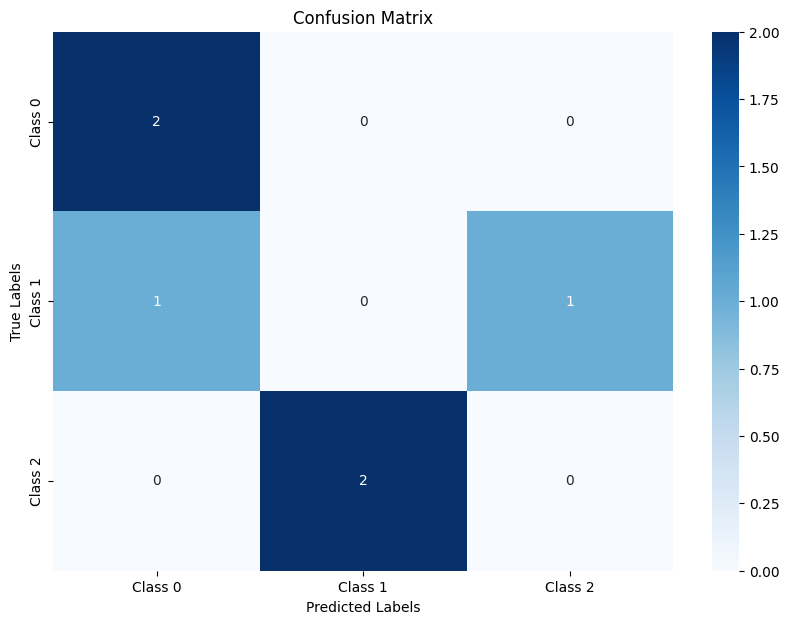

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import math


def calculate_average(numbers):
    if not numbers:
        return None
    return sum(numbers) / len(numbers)


def calculate_standard_deviation(numbers):
    if not numbers:
        return None
    avg = calculate_average(numbers)
    variance = sum((x - avg) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)



def f1_macro(true_labels, predicted_labels):
    return f1_score(true_labels, predicted_labels, average='macro')

def f1_micro(true_labels, predicted_labels):
    return f1_score(true_labels, predicted_labels, average='micro')

def accuracy(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)

def precision(true_labels, predicted_labels):
    return precision_score(true_labels, predicted_labels, average='macro')

def recall(true_labels, predicted_labels):
    return recall_score(true_labels, predicted_labels, average='macro')

def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

if __name__ == "__main__":
    true_labels = [0, 1, 2, 0, 1, 2]
    predicted_labels = [0, 2, 1, 0, 0, 1]
    class_names = ['Class 0', 'Class 1', 'Class 2']

    print("F1 Macro:", f1_macro(true_labels, predicted_labels))
    print("F1 Micro:", f1_micro(true_labels, predicted_labels))
    print("Accuracy:", accuracy(true_labels, predicted_labels))
    print("Precision:", precision(true_labels, predicted_labels))
    print("Recall:", recall(true_labels, predicted_labels))

    plot_confusion_matrix(true_labels, predicted_labels, class_names)

# **Token Classification English Data Preparation**

In [8]:
from datasets import load_dataset

dataset = load_dataset('conll2003')
label_names = dataset['train'].features['ner_tags'].feature.names

train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

total_len= len(train_dataset) + len(val_dataset) + len(test_dataset)

train_percentage = (len(train_dataset) / total_len ) * 100
val_percentage = (len(val_dataset) / total_len ) * 100
test_percentage = (len(test_dataset) / total_len ) * 100

print(f"Train Percentage: {train_percentage:.2f}%")
print(f"Validation Percentage: {val_percentage:.2f}%")
print(f"Test Percentage: {test_percentage:.2f}%")

Train Percentage: 67.69%
Validation Percentage: 15.67%
Test Percentage: 16.65%


In [9]:
label_names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [10]:
def prepare_conll_data(dataset):
    sentences = [example['tokens'] for example in dataset]
    labels = [example['ner_tags'] for example in dataset]
    return sentences, labels


train_sentences, train_labels = prepare_conll_data(train_dataset)
valid_sentences, valid_labels = prepare_conll_data(val_dataset)
test_sentences, test_labels = prepare_conll_data(test_dataset)

print("Training sentences:", train_sentences[:3])
print("Training labels:", train_labels[:3])

Training sentences: [['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], ['Peter', 'Blackburn'], ['BRUSSELS', '1996-08-22']]
Training labels: [[3, 0, 7, 0, 0, 0, 7, 0, 0], [1, 2], [5, 0]]


In [11]:
counter_dict = {}
stop_words = set(stopwords.words('english'))

def ner_statistics(sentences_list, label_list):
    global counter_dict, stop_words
    for i in range(len(label_list)):
        current_sentence = sentences_list[i]
        current_label_list = label_list[i]
        for j in range(len(current_label_list)):
            current_token = current_sentence[j]
            current_label = current_label_list[j]
            if current_token not in stop_words and current_token not in string.punctuation:
                if current_label not in counter_dict.keys():
                    counter_dict[current_label] = 0
                counter_dict[current_label] += 1

ner_statistics(train_sentences, train_labels)
ner_statistics(valid_sentences, valid_labels)
ner_statistics(test_sentences, test_labels)
print(counter_dict)

{3: 9322, 0: 139920, 7: 5062, 1: 10057, 2: 6974, 5: 10645, 4: 4877, 8: 1627, 6: 1639}


In [12]:
stop_words = set(stopwords.words('english'))

def delete_stopwords_and_punctuations(sentences_list, label_list):
    global stop_words
    new_sentence_list = list()
    new_label_list = list()
    for i in range(len(label_list)):
        current_sentence = sentences_list[i]
        current_label_list = label_list[i]
        new_current_sentence = list()
        new_current_label_list = list()
        for j in range(len(current_label_list)):
            current_token = current_sentence[j]
            current_label = current_label_list[j]
            if current_token not in stop_words and current_token not in string.punctuation:
                new_current_sentence.append(current_token.lower())
                new_current_label_list.append(current_label)
        new_sentence_list.append(new_current_sentence)
        new_label_list.append(new_current_label_list)
    return new_sentence_list, new_label_list

new_train_sentences, new_train_labels = delete_stopwords_and_punctuations(train_sentences, train_labels)
new_valid_sentences, new_valid_labels = delete_stopwords_and_punctuations(valid_sentences, valid_labels)
new_test_sentences, new_test_labels = delete_stopwords_and_punctuations(test_sentences, test_labels)

In [13]:
print("Training sentences:", new_train_sentences[:3])
print("Training labels:", new_train_labels[:3])

Training sentences: [['eu', 'rejects', 'german', 'call', 'boycott', 'british', 'lamb'], ['peter', 'blackburn'], ['brussels', '1996-08-22']]
Training labels: [[3, 0, 7, 0, 0, 7, 0], [1, 2], [5, 0]]


# **English Token Classification**

In [14]:
import pandas as pd
from tensorflow import keras
import numpy as np

In [15]:
sentences = [item for sublist in new_train_sentences for item in sublist]
labels = [label_names[item] for sublist in new_train_labels for item in sublist]

sentence_markers = []
sentence_counter = 1
for sublist in new_train_sentences:
    if len(sublist) != len([f"Sentence: {sentence_counter}"] + [np.nan] * (len(sublist) - 1)):
        continue
    sentence_markers.extend([f"Sentence: {sentence_counter}"] + [np.nan] * (len(sublist) - 1))
    sentence_counter += 1

df = pd.DataFrame({
    'Sentence #': sentence_markers,
    'Word': sentences,
    'POS': [np.nan] * len(sentences),
    'Tag': labels
})

print(df)

             Sentence #     Word  POS     Tag
0           Sentence: 1       eu  NaN   B-ORG
1                   NaN  rejects  NaN       O
2                   NaN   german  NaN  B-MISC
3                   NaN     call  NaN       O
4                   NaN  boycott  NaN       O
...                 ...      ...  ...     ...
128217              NaN    three  NaN       O
128218  Sentence: 14018  swansea  NaN   B-ORG
128219              NaN        1  NaN       O
128220              NaN  lincoln  NaN   B-ORG
128221              NaN        2  NaN       O

[128222 rows x 4 columns]


In [16]:
tags = df.Tag.unique()
tags

array(['B-ORG', 'O', 'B-MISC', 'B-PER', 'I-PER', 'B-LOC', 'I-ORG',
       'I-MISC', 'I-LOC'], dtype=object)

In [17]:
id2tag = dict(enumerate(tags))
tag2id = { v : k for k,v in id2tag.items() }

id2tag[0]

'B-ORG'

In [18]:
vocab = set(df['Word'].apply(lambda x: x.lower()))
id2word = { i+1 : v for i,v in enumerate(vocab) }
id2word[0] = '<UNK>'
vocab.add('<UNK>')
word2id = { v : k for k,v in id2word.items() }

In [19]:
X,Y = [],[]
s,t = [],[]
for i,row in df[['Sentence #','Word','Tag']].iterrows():
    if pd.isna(row['Sentence #']):
        s.append(row['Word'])
        t.append(row['Tag'])
    else:
        if len(s)>0:
            X.append(s)
            Y.append(t)
        s,t = [row['Word']],[row['Tag']]
X.append(s)
Y.append(t)

In [20]:
def vectorize(seq):
    return [word2id[x.lower()] for x in seq]

def tagify(seq):
    return [tag2id[x] for x in seq]

Xv = list(map(vectorize,X))
Yv = list(map(tagify,Y))

Xv[0], Yv[0]

([10445, 2764, 14429, 17907, 13538, 13281, 12816], [0, 1, 2, 1, 1, 2, 1])

In [21]:
X_data = keras.preprocessing.sequence.pad_sequences(Xv,padding='post')
Y_data = keras.preprocessing.sequence.pad_sequences(Yv,padding='post')

In [22]:
maxlen = X_data.shape[1]
vocab_size = len(vocab)
num_tags = len(tags)
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, 300, input_length=maxlen),
    keras.layers.Bidirectional(keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    keras.layers.TimeDistributed(keras.layers.Dense(num_tags, activation='softmax'))
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 73, 300)           6288000   
                                                                 
 bidirectional (Bidirection  (None, 73, 200)           320800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 73, 200)           240800    
 onal)                                                           
                                                                 
 time_distributed (TimeDist  (None, 73, 9)             1809      
 ributed)                                                        
                                                                 
Total params: 6851409 (26.14 MB)
Trainable params: 6851409 (26.14 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [23]:
model.fit(X_data,Y_data)

439/439 [==============================] - 256s 564ms/step - loss: 0.1322 - acc: 0.9657


In [24]:
sent = ' '.join(new_test_sentences[9])
words = sent.lower().split()
v = keras.preprocessing.sequence.pad_sequences([[word2id[x] for x in words]],padding='post',maxlen=maxlen)
res = model(v)[0]
r = np.argmax(res.numpy(),axis=1)
for i,w in zip(r,words):
    print(f"{w} -> {id2tag[i]}")

two -> O
goals -> O
defensive -> O
errors -> O
last -> O
six -> O
minutes -> O
allowed -> O
japan -> B-LOC
come -> O
behind -> O
collect -> O
three -> O
points -> O
opening -> O
meeting -> O
syria -> B-LOC


In [25]:
from tqdm import tqdm

final_true_labels = list()
final_predicted_labels = list()

for i in tqdm(range(len(new_test_sentences))):
    try:
        sent = ' '.join(new_test_sentences[i])
        words = sent.lower().split()
        v = keras.preprocessing.sequence.pad_sequences([[word2id[x] for x in words]],padding='post',maxlen=maxlen)
        res = model(v)[0]
        r = np.argmax(res.numpy(),axis=1)
        true_labels = [label_names[k] for k in new_test_labels[i]]
        predicted_labels = list()
        for i,w in zip(r,words):
            predicted_labels.append(id2tag[i])
        final_true_labels += [label_names.index(k) for k in true_labels]
        final_predicted_labels += [label_names.index(k) for k in predicted_labels]
    except:
        pass

100%|██████████| 3453/3453 [11:13<00:00,  5.13it/s]


F1 Macro: 0.4813800885343568
F1 Micro: 0.8981030504998718
Accuracy: 0.8981030504998718
Precision: 0.5469466561963895
Recall: 0.4677141174758838


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


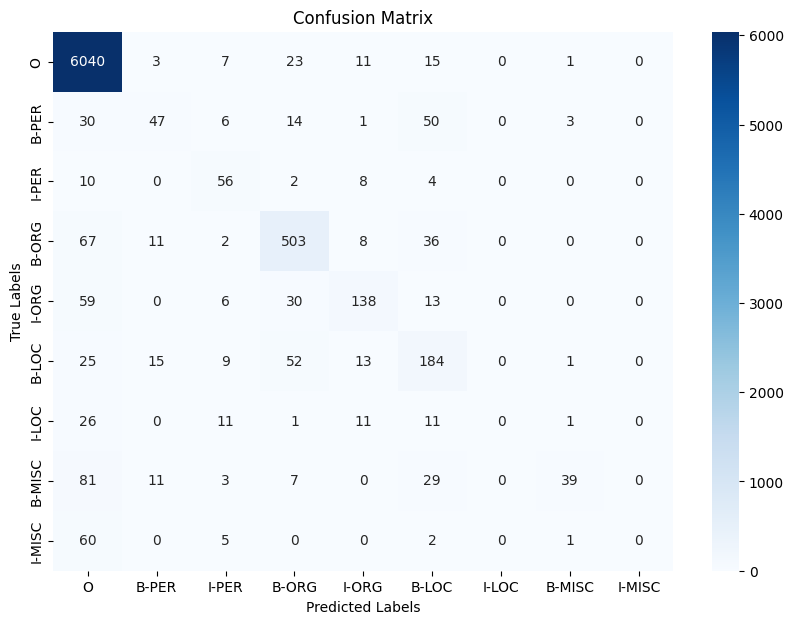

In [26]:
true_labels = final_true_labels
predicted_labels = final_predicted_labels
class_names = label_names

print("F1 Macro:", f1_macro(true_labels, predicted_labels))
print("F1 Micro:", f1_micro(true_labels, predicted_labels))
print("Accuracy:", accuracy(true_labels, predicted_labels))
print("Precision:", precision(true_labels, predicted_labels))
print("Recall:", recall(true_labels, predicted_labels))

plot_confusion_matrix(true_labels, predicted_labels, class_names)

movie names

In [93]:
movie_names = [
    ("Captain America", "O B-LOC"),
    ("The Last King of Scotland", "O O O O B-LOC"),
    ("Madagascar", "B-LOC"),
    ("The Lion King", "O O O"),
    ("Good Morning China", "O O B-LOC"),
    ("The Philadelphia Story", "O B-LOC O"),
    ("Midnight in Paris", "O O B-LOC"),
    ("John Jones", "B-PER I-PER"),
    ("The Prince of Egypt", "O O O B-LOC"),
    ("The Wolf of Wall Street", "O O O B-LOC I-LOC")
]

In [94]:
for name in movie_names:
    sent = name[0]
    words = sent.lower().split()
    v = keras.preprocessing.sequence.pad_sequences([[word2id[x] for x in words]],padding='post',maxlen=maxlen)
    res = model(v)[0]
    r = np.argmax(res.numpy(),axis=1)
    for i,w in zip(r,words):
        print(f"{w} -> {id2tag[i]}")
    print(name[1])
    print("-" * 30)

captain -> O
america -> B-ORG
O B-LOC
------------------------------
the -> O
last -> O
king -> O
of -> O
scotland -> B-LOC
O O O O B-LOC
------------------------------
madagascar -> B-ORG
B-LOC
------------------------------
the -> O
lion -> O
king -> O
O O O
------------------------------
good -> O
morning -> O
china -> B-ORG
O O B-LOC
------------------------------
the -> O
philadelphia -> B-ORG
story -> O
O B-LOC O
------------------------------
midnight -> O
in -> O
paris -> B-LOC
O O B-LOC
------------------------------
john -> B-LOC
jones -> I-PER
B-PER I-PER
------------------------------
the -> O
prince -> B-LOC
of -> O
egypt -> B-LOC
O O O B-LOC
------------------------------
the -> O
wolf -> B-PER
of -> O
wall -> B-LOC
street -> O
O O O B-LOC I-LOC
------------------------------


# **Token Classification Persian Data Preparation**

In [ ]:
!unzip arman.zip

don't forget to test word classification on 10 persian and 10 english film names

In [98]:
def read_tokens_and_labels(tokens_file_path, labels_file_path):
    sentences = []
    labels = []

    with open(tokens_file_path, 'r', encoding='utf-8', errors='replace') as tokens_file, \
         open(labels_file_path, 'r', encoding='utf-8', errors='replace') as labels_file:

        token_lines = tokens_file.readlines()
        label_lines = labels_file.readlines()

        assert len(token_lines) == len(label_lines), "Files must have the same number of lines."

        for token_line, label_line in zip(token_lines, label_lines):
            tokens = token_line.strip().split()
            labels_ = label_line.strip().split()

            assert len(tokens) == len(labels_), "Each line must have the same number of tokens and labels."

            sentences.append(tokens)
            labels.append(labels_)

    flat_tokens = [token for sentence in sentences for token in sentence]
    flat_labels = [label for label_list in labels for label in label_list]

    df = pd.DataFrame({'Token': flat_tokens, 'Label': flat_labels})

    return df, sentences, labels


tokens_file_path = 'arman-tokens.txt'
labels_file_path = 'arman-labels.txt'
df, sentences, labels = read_tokens_and_labels(tokens_file_path, labels_file_path)

In [99]:
df.head(20)

,Token,Label
0,افقی,O
1,:,O
2,0,O
3,ـ,O
4,از,O
5,عوامل,O
6,دوران,O
7,پهلوی,O
8,و,O
9,نخست‌وزیر,O


In [100]:
ner_count = df['Label'].value_counts()
print(ner_count)

Label
O          674907
I-org       16509
B-org       13599
B-loc       10224
B-pers       9825
I-pers       5820
I-event      5817
I-fac        2808
I-loc        2700
I-pro        2217
B-pro        2172
B-event      1740
B-fac        1650
Name: count, dtype: int64


In [101]:
all_unique_ne = df['Label'].unique().tolist()
ne2id = dict()
id2ne = dict()

for i, ne in enumerate(all_unique_ne):
    ne2id[ne] = i
    id2ne[i] = ne

In [102]:
import random

def split_data(list1, list2, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_seed=42):
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length")

    if random_seed is not None:
        random.seed(random_seed)

    indices = list(range(len(list1)))
    random.shuffle(indices)

    train_size = int(len(list1) * train_ratio)
    val_size = int(len(list1) * val_ratio)

    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]
    test_indices = indices[train_size + val_size:]

    list1_train = [list1[i] for i in train_indices]
    list1_val = [list1[i] for i in val_indices]
    list1_test = [list1[i] for i in test_indices]

    list2_train = [list2[i] for i in train_indices]
    list2_val = [list2[i] for i in val_indices]
    list2_test = [list2[i] for i in test_indices]

    return list1_train, list1_val, list1_test, list2_train, list2_val, list2_test

sentences_train, sentences_valid, sentences_test, labels_train, labels_valid, labels_test = split_data(sentences, labels, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, random_seed=42)

In [103]:
counter_dict = {}
stop_words = ['و', 'در', 'به', 'از', 'كه', 'مي', 'اين', 'است', 'را', 'با', 'هاي', 'براي', 'آن', 'يك', 'شود', 'شده', 'خود', 'ها', 'كرد', 'شد', 'اي', 'تا', 'كند', 'بر', 'بود', 'گفت', 'نيز', 'وي', 'هم', 'كنند', 'دارد', 'ما', 'كرده', 'يا', 'اما', 'بايد', 'دو', 'اند', 'هر', 'خواهد', 'او', 'مورد', 'آنها', 'باشد', 'ديگر', 'مردم', 'نمي', 'بين', 'پيش', 'پس', 'اگر', 'همه', 'صورت', 'يكي', 'هستند', 'بي', 'من', 'دهد', 'هزار', 'نيست', 'استفاده', 'داد', 'داشته', 'راه', 'داشت', 'چه', 'همچنين', 'كردند', 'داده', 'بوده', 'دارند', 'همين', 'ميليون', 'سوي', 'شوند', 'بيشتر', 'بسيار', 'روي', 'گرفته', 'هايي', 'تواند', 'اول', 'نام', 'هيچ', 'چند', 'جديد', 'بيش', 'شدن', 'كردن', 'كنيم', 'نشان', 'حتي', 'اينكه', 'ولی', 'توسط', 'چنين', 'برخي', 'نه', 'ديروز', 'دوم', 'درباره', 'بعد', 'مختلف', 'گيرد', 'شما', 'گفته', 'آنان', 'بار', 'طور', 'گرفت', 'دهند', 'گذاري', 'بسياري', 'طي', 'بودند', 'ميليارد', 'بدون', 'تمام', 'كل', 'تر  براساس', 'شدند', 'ترين', 'امروز', 'باشند', 'ندارد', 'چون', 'قابل', 'گويد', 'ديگري', 'همان', 'خواهند', 'قبل', 'آمده', 'اكنون', 'تحت', 'طريق', 'گيري', 'جاي', 'هنوز', 'چرا', 'البته', 'كنيد', 'سازي', 'سوم', 'كنم', 'بلكه', 'زير', 'توانند', 'ضمن', 'فقط', 'بودن', 'حق', 'آيد', 'وقتي', 'اش', 'يابد', 'نخستين', 'مقابل', 'خدمات', 'امسال', 'تاكنون', 'مانند', 'تازه', 'آورد', 'فكر', 'آنچه', 'نخست', 'نشده', 'شايد', 'چهار', 'جريان', 'پنج', 'ساخته', 'زيرا', 'نزديك', 'برداري', 'كسي', 'ريزي', 'رفت', 'گردد', 'مثل', 'آمد', 'ام', 'بهترين', 'دانست', 'كمتر', 'دادن', 'تمامي', 'جلوگيري', 'بيشتري', 'ايم', 'ناشي', 'چيزي', 'آنكه', 'بالا', 'بنابراين', 'ايشان', 'بعضي', 'دادند', 'داشتند', 'برخوردار', 'نخواهد', 'هنگام', 'نبايد', 'غير', 'نبود', 'ديده', 'وگو', 'داريم', 'چگونه', 'بندي', 'خواست', 'فوق', 'ده', 'نوعي', 'هستيم', 'ديگران', 'همچنان', 'سراسر', 'ندارند', 'گروهي', 'سعي', 'روزهاي', 'آنجا', 'يكديگر', 'كردم', 'بيست', 'بروز', 'سپس', 'رفته', 'آورده', 'نمايد', 'باشيم', 'گويند', 'زياد', 'خويش', 'همواره', 'گذاشته', 'شش  نداشته', 'شناسي', 'خواهيم', 'آباد', 'داشتن', 'نظير', 'همچون', 'باره', 'نكرده', 'شان', 'سابق', 'هفت', 'دانند', 'جايي', 'بی', 'جز', 'زیرِ', 'رویِ', 'سریِ', 'تویِ', 'جلویِ', 'پیشِ', 'عقبِ', 'بالایِ', 'خارجِ', 'وسطِ', 'بیرونِ', 'سویِ', 'کنارِ', 'پاعینِ', 'نزدِ', 'نزدیکِ', 'دنبالِ', 'حدودِ', 'برابرِ', 'طبقِ', 'مانندِ', 'ضدِّ', 'هنگامِ', 'برایِ', 'مثلِ', 'بارة', 'اثرِ', 'تولِ', 'علّتِ', 'سمتِ', 'عنوانِ', 'قصدِ', 'روب', 'جدا', 'کی', 'که', 'چیست', 'هست', 'کجا', 'کجاست', 'کَی', 'چطور', 'کدام', 'آیا', 'مگر', 'چندین', 'یک', 'چیزی', 'دیگر', 'کسی', 'بعری', 'هیچ', 'چیز', 'جا', 'کس', 'هرگز', 'یا', 'تنها', 'بلکه', 'خیاه', 'بله', 'بلی', 'آره', 'آری', 'مرسی', 'البتّه', 'لطفاً', 'ّه', 'انکه', 'وقتیکه', 'همین', 'پیش', 'مدّتی', 'هنگامی', 'مان', 'تان']

def ner_statistics(sentences_list, label_list):
    global counter_dict, stop_words
    for i in range(len(label_list)):
        current_sentence = sentences_list[i]
        current_label_list = label_list[i]
        for j in range(len(current_label_list)):
            current_token = current_sentence[j]
            current_label = current_label_list[j]
            if current_token not in stop_words and current_token not in string.punctuation:
                if current_label not in counter_dict.keys():
                    counter_dict[current_label] = 0
                counter_dict[current_label] += 1

ner_statistics(sentences_train, labels_train)
ner_statistics(sentences_valid, labels_valid)
ner_statistics(sentences_test, labels_test)
print(counter_dict)

{'O': 420375, 'B-loc': 10221, 'B-org': 13572, 'I-org': 15420, 'B-pers': 9825, 'I-pers': 5742, 'B-pro': 2121, 'B-event': 1740, 'I-event': 5508, 'I-loc': 2613, 'B-fac': 1650, 'I-fac': 2739, 'I-pro': 1971}


In [104]:
stop_words = ['و', 'در', 'به', 'از', 'كه', 'مي', 'اين', 'است', 'را', 'با', 'هاي', 'براي', 'آن', 'يك', 'شود', 'شده', 'خود', 'ها', 'كرد', 'شد', 'اي', 'تا', 'كند', 'بر', 'بود', 'گفت', 'نيز', 'وي', 'هم', 'كنند', 'دارد', 'ما', 'كرده', 'يا', 'اما', 'بايد', 'دو', 'اند', 'هر', 'خواهد', 'او', 'مورد', 'آنها', 'باشد', 'ديگر', 'مردم', 'نمي', 'بين', 'پيش', 'پس', 'اگر', 'همه', 'صورت', 'يكي', 'هستند', 'بي', 'من', 'دهد', 'هزار', 'نيست', 'استفاده', 'داد', 'داشته', 'راه', 'داشت', 'چه', 'همچنين', 'كردند', 'داده', 'بوده', 'دارند', 'همين', 'ميليون', 'سوي', 'شوند', 'بيشتر', 'بسيار', 'روي', 'گرفته', 'هايي', 'تواند', 'اول', 'نام', 'هيچ', 'چند', 'جديد', 'بيش', 'شدن', 'كردن', 'كنيم', 'نشان', 'حتي', 'اينكه', 'ولی', 'توسط', 'چنين', 'برخي', 'نه', 'ديروز', 'دوم', 'درباره', 'بعد', 'مختلف', 'گيرد', 'شما', 'گفته', 'آنان', 'بار', 'طور', 'گرفت', 'دهند', 'گذاري', 'بسياري', 'طي', 'بودند', 'ميليارد', 'بدون', 'تمام', 'كل', 'تر  براساس', 'شدند', 'ترين', 'امروز', 'باشند', 'ندارد', 'چون', 'قابل', 'گويد', 'ديگري', 'همان', 'خواهند', 'قبل', 'آمده', 'اكنون', 'تحت', 'طريق', 'گيري', 'جاي', 'هنوز', 'چرا', 'البته', 'كنيد', 'سازي', 'سوم', 'كنم', 'بلكه', 'زير', 'توانند', 'ضمن', 'فقط', 'بودن', 'حق', 'آيد', 'وقتي', 'اش', 'يابد', 'نخستين', 'مقابل', 'خدمات', 'امسال', 'تاكنون', 'مانند', 'تازه', 'آورد', 'فكر', 'آنچه', 'نخست', 'نشده', 'شايد', 'چهار', 'جريان', 'پنج', 'ساخته', 'زيرا', 'نزديك', 'برداري', 'كسي', 'ريزي', 'رفت', 'گردد', 'مثل', 'آمد', 'ام', 'بهترين', 'دانست', 'كمتر', 'دادن', 'تمامي', 'جلوگيري', 'بيشتري', 'ايم', 'ناشي', 'چيزي', 'آنكه', 'بالا', 'بنابراين', 'ايشان', 'بعضي', 'دادند', 'داشتند', 'برخوردار', 'نخواهد', 'هنگام', 'نبايد', 'غير', 'نبود', 'ديده', 'وگو', 'داريم', 'چگونه', 'بندي', 'خواست', 'فوق', 'ده', 'نوعي', 'هستيم', 'ديگران', 'همچنان', 'سراسر', 'ندارند', 'گروهي', 'سعي', 'روزهاي', 'آنجا', 'يكديگر', 'كردم', 'بيست', 'بروز', 'سپس', 'رفته', 'آورده', 'نمايد', 'باشيم', 'گويند', 'زياد', 'خويش', 'همواره', 'گذاشته', 'شش  نداشته', 'شناسي', 'خواهيم', 'آباد', 'داشتن', 'نظير', 'همچون', 'باره', 'نكرده', 'شان', 'سابق', 'هفت', 'دانند', 'جايي', 'بی', 'جز', 'زیرِ', 'رویِ', 'سریِ', 'تویِ', 'جلویِ', 'پیشِ', 'عقبِ', 'بالایِ', 'خارجِ', 'وسطِ', 'بیرونِ', 'سویِ', 'کنارِ', 'پاعینِ', 'نزدِ', 'نزدیکِ', 'دنبالِ', 'حدودِ', 'برابرِ', 'طبقِ', 'مانندِ', 'ضدِّ', 'هنگامِ', 'برایِ', 'مثلِ', 'بارة', 'اثرِ', 'تولِ', 'علّتِ', 'سمتِ', 'عنوانِ', 'قصدِ', 'روب', 'جدا', 'کی', 'که', 'چیست', 'هست', 'کجا', 'کجاست', 'کَی', 'چطور', 'کدام', 'آیا', 'مگر', 'چندین', 'یک', 'چیزی', 'دیگر', 'کسی', 'بعری', 'هیچ', 'چیز', 'جا', 'کس', 'هرگز', 'یا', 'تنها', 'بلکه', 'خیاه', 'بله', 'بلی', 'آره', 'آری', 'مرسی', 'البتّه', 'لطفاً', 'ّه', 'انکه', 'وقتیکه', 'همین', 'پیش', 'مدّتی', 'هنگامی', 'مان', 'تان']

def delete_stopwords_and_punctuations(sentences_list, label_list):
    global stop_words
    new_sentence_list = list()
    new_label_list = list()
    for i in range(len(label_list)):
        current_sentence = sentences_list[i]
        current_label_list = label_list[i]
        new_current_sentence = list()
        new_current_label_list = list()
        for j in range(len(current_label_list)):
            current_token = current_sentence[j]
            current_label = current_label_list[j]
            if current_token not in stop_words and current_token not in string.punctuation:
                new_current_sentence.append(current_token.lower())
                new_current_label_list.append(current_label)
        new_sentence_list.append(new_current_sentence)
        new_label_list.append(new_current_label_list)
    return new_sentence_list, new_label_list

new_train_sentences, new_train_labels = delete_stopwords_and_punctuations(sentences_train, labels_train)
new_valid_sentences, new_valid_labels = delete_stopwords_and_punctuations(sentences_valid, labels_valid)
new_test_sentences, new_test_labels = delete_stopwords_and_punctuations(sentences_test, labels_test)

# **Persian Token Classification**

In [105]:
import pandas as pd
from tensorflow import keras
import numpy as np

In [106]:
sentences = [item for sublist in new_train_sentences for item in sublist]
labels = [item for sublist in new_train_labels for item in sublist]

sentence_markers = []
sentence_counter = 1
for sublist in new_train_sentences:
    if len(sublist) != len([f"Sentence: {sentence_counter}"] + [np.nan] * (len(sublist) - 1)):
        continue
    sentence_markers.extend([f"Sentence: {sentence_counter}"] + [np.nan] * (len(sublist) - 1))
    sentence_counter += 1

df = pd.DataFrame({
    'Sentence #': sentence_markers,
    'Word': sentences,
    'POS': [np.nan] * len(sentences),
    'Tag': labels
})

print(df)

         Sentence #        Word  POS      Tag
0       Sentence: 1    بنابراین  NaN        O
1               NaN       رابطه  NaN        O
2               NaN      روحانی  NaN        O
3               NaN       رابطه  NaN        O
4               NaN     دیالوگی  NaN        O
...             ...         ...  ...      ...
395184          NaN        رئال  NaN    B-org
395185          NaN     سوپرجام  NaN  B-event
395186          NaN       اروپا  NaN  I-event
395187          NaN  گالاتاسرای  NaN    B-org
395188          NaN         دست  NaN        O

[395189 rows x 4 columns]


In [107]:
tags = df.Tag.unique()
tags

array(['O', 'B-loc', 'B-org', 'I-org', 'B-pers', 'I-pers', 'B-pro',
       'B-event', 'I-event', 'I-loc', 'B-fac', 'I-fac', 'I-pro'],
      dtype=object)

In [108]:
id2tag = dict(enumerate(tags))
tag2id = { v : k for k,v in id2tag.items() }

id2tag[0]

'O'

In [109]:
vocab = set(df['Word'].apply(lambda x: x.lower()))
id2word = { i+1 : v for i,v in enumerate(vocab) }
id2word[0] = '<UNK>'
vocab.add('<UNK>')
word2id = { v : k for k,v in id2word.items() }

In [110]:
X,Y = [],[]
s,t = [],[]
for i,row in df[['Sentence #','Word','Tag']].iterrows():
    if pd.isna(row['Sentence #']):
        s.append(row['Word'])
        t.append(row['Tag'])
    else:
        if len(s)>0:
            X.append(s)
            Y.append(t)
        s,t = [row['Word']],[row['Tag']]
X.append(s)
Y.append(t)

In [111]:
def vectorize(seq):
    return [word2id[x.lower()] for x in seq]

def tagify(seq):
    return [tag2id[x] for x in seq]

Xv = list(map(vectorize,X))
Yv = list(map(tagify,Y))

Xv[0], Yv[0]

([2516, 15220, 7563, 15220, 13875, 15549], [0, 0, 0, 0, 0, 0])

In [112]:
X_data = keras.preprocessing.sequence.pad_sequences(Xv,padding='post')
Y_data = keras.preprocessing.sequence.pad_sequences(Yv,padding='post')

In [113]:
maxlen = X_data.shape[1]
vocab_size = len(vocab)
num_tags = len(tags)
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, 300, input_length=maxlen),
    keras.layers.Bidirectional(keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    keras.layers.TimeDistributed(keras.layers.Dense(num_tags, activation='softmax'))
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 187, 300)          5389500   
                                                                 
 bidirectional_2 (Bidirecti  (None, 187, 200)          320800    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 187, 200)          240800    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 187, 13)           2613      
 stributed)                                                      
                                                                 
Total params: 5953713 (22.71 MB)
Trainable params: 5953713 (22.71 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [114]:
model.fit(X_data,Y_data)

576/576 [==============================] - 760s 1s/step - loss: 0.0771 - acc: 0.9838


In [115]:
sent = ' '.join(new_test_sentences[40])
words = sent.lower().split()
v = keras.preprocessing.sequence.pad_sequences([[word2id[x] for x in words]],padding='post',maxlen=maxlen)
res = model(v)[0]
r = np.argmax(res.numpy(),axis=1)
for i,w in zip(r,words):
    print(f"{w} -> {id2tag[i]}")

آیت‌الله -> O
یوسف -> B-pers
صانعی -> I-pers
اعلام -> O
کردند -> O
دولت -> O
آقای -> O
خاتمی -> B-pers
زیادی -> O
زمینه‌های -> O
اقتصادی -> O
سیاسی -> O
انجام -> O


In [ ]:
from tqdm import tqdm

final_true_labels = list()
final_predicted_labels = list()

for i in tqdm(range(len(new_test_sentences))):
    try:
        sent = ' '.join(new_test_sentences[i])
        words = sent.lower().split()
        v = keras.preprocessing.sequence.pad_sequences([[word2id[x] for x in words]],padding='post',maxlen=maxlen)
        res = model(v)[0]
        r = np.argmax(res.numpy(),axis=1)
        true_labels = new_test_labels[i]
        predicted_labels = list()
        for i,w in zip(r,words):
            predicted_labels.append(id2tag[i])
        final_true_labels += [tag2id[k] for k in true_labels]
        final_predicted_labels += [tag2id[k] for k in predicted_labels]
    except:
        pass

100%|██████████| 2305/2305 [50:38<00:00,  1.32s/it]


F1 Macro: 0.2861490237534387
F1 Micro: 0.9003020527256662
Accuracy: 0.9003020527256662
Precision: 0.3205330154341237
Recall: 0.2941872188674185


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


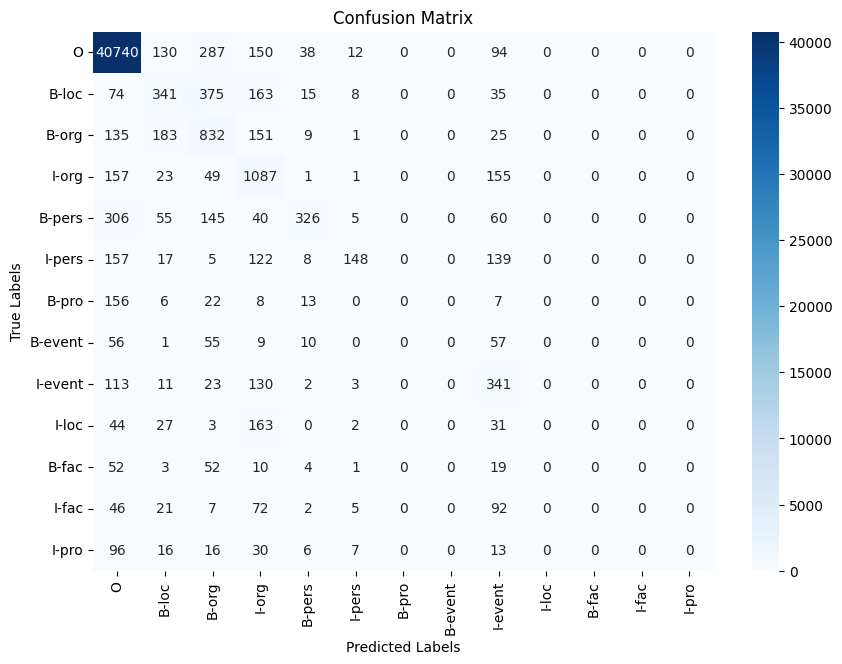

In [ ]:
true_labels = final_true_labels
predicted_labels = final_predicted_labels
class_names = list()
for i in range(len(id2tag)):
    class_names.append(id2tag[i])

print("F1 Macro:", f1_macro(true_labels, predicted_labels))
print("F1 Micro:", f1_micro(true_labels, predicted_labels))
print("Accuracy:", accuracy(true_labels, predicted_labels))
print("Precision:", precision(true_labels, predicted_labels))
print("Recall:", recall(true_labels, predicted_labels))

plot_confusion_matrix(true_labels, predicted_labels, class_names)

In [180]:
movie_titles = [
    ("قصه شیراز", "O B-LOC"),
    ("خانه روی آب", "O O O"),
    ("سفر تهران", "O B-LOC"),
    ("پسر ایرانی", "O B-LOC"),
    ("ملاقات شهید چمران", "O O B-PER"),
    ("داستان شرکت سایپا", "O B-ORG I-ORG"),
    ("رضا محمدی", "B-PER I-PER"),
    ("زندگی عاشقانه", "O O"),
    ("اصفهان زیبا", "B-LOC O"),
    ("جنگ ایران عراق", "O B-ORG I-ORG")
]

In [181]:
for movie in movie_titles:
    sent = movie[0]
    words = sent.lower().split()
    v = keras.preprocessing.sequence.pad_sequences([[word2id[x] for x in words]],padding='post',maxlen=maxlen)
    res = model(v)[0]
    r = np.argmax(res.numpy(),axis=1)
    for i,w in zip(r,words):
        print(f"{w} -> {id2tag[i]}")
    print(movie[1])
    print("-" * 30)

قصه -> O
شیراز -> B-loc
O B-LOC
------------------------------
خانه -> O
روی -> O
آب -> O
O O O
------------------------------
سفر -> O
تهران -> B-loc
O B-LOC
------------------------------
پسر -> O
ایرانی -> B-loc
O B-LOC
------------------------------
ملاقات -> O
شهید -> O
چمران -> O
O O B-PER
------------------------------
داستان -> O
شرکت -> B-org
سایپا -> I-org
O B-ORG I-ORG
------------------------------
رضا -> B-pers
محمدی -> O
B-PER I-PER
------------------------------
زندگی -> O
عاشقانه -> O
O O
------------------------------
اصفهان -> B-loc
زیبا -> O
B-LOC O
------------------------------
جنگ -> O
ایران -> B-org
عراق -> I-org
O B-ORG I-ORG
------------------------------
